In [1]:
import pandas as pd
data = pd.read_csv("/kaggle/input/korean-demographics-20002022/Korean_demographics_2000-2022.csv")
data.head()

,Date,Region,Birth,Birth_rate,Death,Death_rate,Divorce,Divorce_rate,Marriage,Marriage_rate,Natural_growth,Natural_growth_rate
0,1/1/2000,Busan,3752.0,11.61,1875.0,5.8,814.0,2.5,2435.0,7.5,1877.0,5.8
1,1/1/2000,Chungcheongbuk-do,1903.0,15.06,924.0,7.3,220.0,1.7,828.0,6.6,979.0,7.7
2,1/1/2000,Chungcheongnam-do,2398.0,14.75,1466.0,9.0,321.0,2.0,1055.0,6.5,932.0,5.7
3,1/1/2000,Daegu,3057.0,14.39,1117.0,5.3,422.0,2.0,1577.0,7.4,1940.0,9.1
4,1/1/2000,Daejeon,1859.0,16.08,565.0,4.9,280.0,2.4,868.0,7.5,1294.0,11.2


In [2]:
data_description = data.describe()
data_info = data.info()

data_description, data_info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4860 entries, 0 to 4859
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Date                 4860 non-null   object 
 1   Region               4860 non-null   object 
 2   Birth                4716 non-null   float64
 3   Birth_rate           4709 non-null   float64
 4   Death                4716 non-null   float64
 5   Death_rate           4709 non-null   float64
 6   Divorce              4716 non-null   float64
 7   Divorce_rate         4709 non-null   float64
 8   Marriage             4716 non-null   float64
 9   Marriage_rate        4709 non-null   float64
 10  Natural_growth       4716 non-null   float64
 11  Natural_growth_rate  4709 non-null   float64
dtypes: float64(10), object(2)
memory usage: 455.8+ KB


(              Birth   Birth_rate         Death   Death_rate       Divorce  \
 count   4716.000000  4709.000000   4716.000000  4709.000000   4716.000000   
 mean    4138.169635     8.737872   2556.818066     5.857528   1130.374894   
 std     8450.112413     2.358128   5029.234791     1.589019   2287.594278   
 min       67.000000     3.100000     52.000000     3.100000     10.000000   
 25%     1004.750000     7.210000    692.500000     4.500000    278.000000   
 50%     1431.500000     8.830000   1149.000000     5.600000    392.000000   
 75%     2327.000000    10.070000   1721.000000     7.000000    651.250000   
 max    61644.000000    18.770000  44487.000000    15.700000  15517.000000   
 
        Divorce_rate      Marriage  Marriage_rate  Natural_growth  \
 count   4709.000000   4716.000000    4709.000000     4716.000000   
 mean       2.351391   2786.632952       5.608452     1581.350085   
 std        0.486523   5784.566575       1.458931     4157.926276   
 min        0.800000

In [3]:
import pandas as pd
numerical_columns = data.select_dtypes(include=['float64']).columns
data[numerical_columns] = data[numerical_columns].fillna(data[numerical_columns].median())

data['Date'] = pd.to_datetime(data['Date'])

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4860 entries, 0 to 4859
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Date                 4860 non-null   datetime64[ns]
 1   Region               4860 non-null   object        
 2   Birth                4860 non-null   float64       
 3   Birth_rate           4860 non-null   float64       
 4   Death                4860 non-null   float64       
 5   Death_rate           4860 non-null   float64       
 6   Divorce              4860 non-null   float64       
 7   Divorce_rate         4860 non-null   float64       
 8   Marriage             4860 non-null   float64       
 9   Marriage_rate        4860 non-null   float64       
 10  Natural_growth       4860 non-null   float64       
 11  Natural_growth_rate  4860 non-null   float64       
dtypes: datetime64[ns](1), float64(10), object(1)
memory usage: 455.8+ KB


In [4]:
sejong_filter = (data['Region'] == 'Sejong') & (data.isnull().any(axis=1))
data_without_sejong = data[~sejong_filter]
print(data_without_sejong[data_without_sejong['Region'] == 'Sejong'].head())

         Date  Region   Birth  Birth_rate   Death  Death_rate  Divorce  \
14 2000-01-01  Sejong  1431.5        8.83  1149.0         5.6    392.0   
32 2000-02-01  Sejong  1431.5        8.83  1149.0         5.6    392.0   
50 2000-03-01  Sejong  1431.5        8.83  1149.0         5.6    392.0   
68 2000-04-01  Sejong  1431.5        8.83  1149.0         5.6    392.0   
86 2000-05-01  Sejong  1431.5        8.83  1149.0         5.6    392.0   

    Divorce_rate  Marriage  Marriage_rate  Natural_growth  Natural_growth_rate  
14           2.3     908.5            5.5           444.5                  2.9  
32           2.3     908.5            5.5           444.5                  2.9  
50           2.3     908.5            5.5           444.5                  2.9  
68           2.3     908.5            5.5           444.5                  2.9  
86           2.3     908.5            5.5           444.5                  2.9  


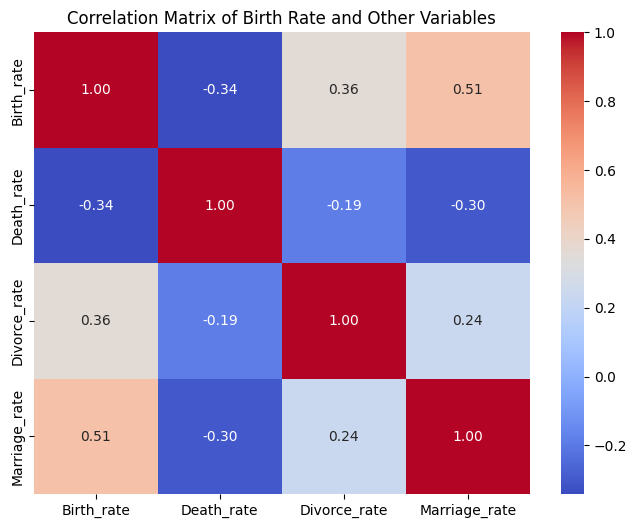

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

relevant_columns = ['Birth_rate', 'Death_rate', 'Divorce_rate', 'Marriage_rate']
subset_data = data[relevant_columns]

correlation_matrix = subset_data.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Birth Rate and Other Variables')
plt.show()


In [6]:
data= data_without_sejong

In [7]:
X = data.drop(['Birth_rate','Region','Date','Birth','Natural_growth','Natural_growth_rate'], axis=1)
y = data['Birth_rate']
X

,Death,Death_rate,Divorce,Divorce_rate,Marriage,Marriage_rate
0,1875.0,5.8,814.0,2.5,2435.0,7.5
1,924.0,7.3,220.0,1.7,828.0,6.6
2,1466.0,9.0,321.0,2.0,1055.0,6.5
3,1117.0,5.3,422.0,2.0,1577.0,7.4
4,565.0,4.9,280.0,2.4,868.0,7.5
...,...,...,...,...,...,...
4855,1369.0,9.1,299.0,2.0,479.0,3.2
4856,106.0,3.4,43.0,1.4,123.0,3.9
4857,3631.0,4.7,1088.0,1.4,2630.0,3.4
4858,434.0,4.7,154.0,1.7,316.0,3.5


In [8]:
import pandas as pd
import numpy as np

def MYtrain_test_split(X, y, test_size=0.2):

    if not 0 < test_size < 1:
        raise ValueError("테스트사이즈는 0 과 1 사이여야함.")
    assert X.index.equals(y.index), "The indices of X and y should be aligned."

    shuffled_indices = np.random.permutation(len(X))

    test_set_size = int(len(X) * test_size)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]

    X_train = X.iloc[train_indices]
    X_test = X.iloc[test_indices]
    y_train = y.iloc[train_indices]
    y_test = y.iloc[test_indices]

    return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = MYtrain_test_split(X, y, test_size=0.2)
X_train, X_val, y_train, y_val = MYtrain_test_split(X_train, y_train, test_size=0.25) # 0.25 x 0.8 = 0.2
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2916 entries, 2162 to 2548
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Death          2916 non-null   float64
 1   Death_rate     2916 non-null   float64
 2   Divorce        2916 non-null   float64
 3   Divorce_rate   2916 non-null   float64
 4   Marriage       2916 non-null   float64
 5   Marriage_rate  2916 non-null   float64
dtypes: float64(6)
memory usage: 159.5 KB


In [9]:
import numpy as np

class MYLinearRegression:
    def __init__(self):
        self.weights = None

    def fit(self, X, y):
        X_b = np.c_[np.ones((X.shape[0], 1)), X]
        self.weights = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

    def predict(self, X):
        X_b = np.c_[np.ones((X.shape[0], 1)), X]
        return X_b.dot(self.weights)

    def score(self, X, y):
        y_pred = self.predict(X)
        ss_tot = np.sum((y - y.mean()) ** 2)
        ss_res = np.sum((y - y_pred) ** 2)
        r2 = 1 - (ss_res / ss_tot)
        return r2


In [10]:
model = MYLinearRegression()
model.fit(X_train, y_train)

In [11]:
predictions = model.predict(X_test)
r2_test = model.score(X_test, y_test)

validations= model.predict(X_val)
r2_val= model.score(X_val, y_val)

round(r2_test,5),round(r2_val,5)


(0.334, 0.32947)

In [12]:
#Sklearn-LinearRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

X_train, X_test, y_train, y_test = MYtrain_test_split(X, y, test_size=0.2)

libmodel = LinearRegression()
libmodel.fit(X_train, y_train)
y_pred = libmodel.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
round(r2,5)

0.35705

In [13]:
#Sklearn-RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
random_forest_model = RandomForestRegressor(n_estimators=100, random_state=42)

random_forest_model.fit(X_train, y_train)

y_pred = random_forest_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
round(r2,5)

0.57676

In [14]:
#Sklearn-SVM
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score

svm_model = SVR(kernel='rbf')
svm_model.fit(X_train, y_train)
y_pred = svm_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
round(r2,5)

0.26645

In [15]:
import joblib
joblib.dump(model, 'my_model.pkl')

['my_model.pkl']